
<h2>COVID-19 WORLD VACCINATION DATA<h2>

Daily and Total Vaccination for COVID-19 in the World

data obtained from https://www.kaggle.com/gpreda/covid-world-vaccination-progress

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
%matplotlib inline

<h4>Data Preview<h4>

In [2]:
df = pd.read_csv('country_vaccinations.csv')
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,https://tolonews.com/index.php/health-170355
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://tolonews.com/index.php/health-170355
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://tolonews.com/index.php/health-170355
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://tolonews.com/index.php/health-170355
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://tolonews.com/index.php/health-170355


In [3]:
# Change columns name
headers = ["Country","ISO Code","Date","Total Vaccinations","People Vaccinated","People Fully Vaccinated","Daily Vaccinations (Raw)","Daily Vaccinations","Total Vaccinations (per hundred)","People Vaccinated (per hundred)","People Fully Vaccinated (per hundred)","Daily Vaccinations (per million)","Vaccine","Source Name","Source Website"]

df.columns = headers

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6998 entries, 0 to 6997
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Country                                6998 non-null   object 
 1   ISO Code                               6998 non-null   object 
 2   Date                                   6998 non-null   object 
 3   Total Vaccinations                     4377 non-null   float64
 4   People Vaccinated                      3894 non-null   float64
 5   People Fully Vaccinated                2634 non-null   float64
 6   Daily Vaccinations (Raw)               3685 non-null   float64
 7   Daily Vaccinations                     6818 non-null   float64
 8   Total Vaccinations (per hundred)       4377 non-null   float64
 9   People Vaccinated (per hundred)        3894 non-null   float64
 10  People Fully Vaccinated (per hundred)  2634 non-null   float64
 11  Dail

In [5]:
#Change Date dtype into datetime
df['Date']= pd.to_datetime(df['Date'])

In [6]:
pd.options.display.float_format = '{:,.2f}'.format
df.describe()

,Total Vaccinations,People Vaccinated,People Fully Vaccinated,Daily Vaccinations (Raw),Daily Vaccinations,Total Vaccinations (per hundred),People Vaccinated (per hundred),People Fully Vaccinated (per hundred),Daily Vaccinations (per million)
count,"4,377.00","3,894.00","2,634.00","3,685.00","6,818.00","4,377.00","3,894.00","2,634.00","6,818.00"
mean,"2,292,320.36","1,867,102.31","765,339.28","85,333.03","58,365.12",9.15,7.07,3.23,"2,686.34"
std,"8,137,137.18","6,049,106.14","3,090,502.90","261,043.66","196,411.46",16.63,11.42,7.05,"4,265.46"
min,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,"36,551.00","33,783.00","17,527.00","2,654.00","1,038.50",0.70,0.70,0.36,358.00
50%,"247,933.00","227,647.50","94,679.50","13,399.00","6,229.00",3.37,2.97,1.31,"1,253.50"
75%,"1,168,025.00","927,997.75","452,053.50","56,572.00","27,383.00",9.62,7.57,2.87,"3,049.75"
max,"113,037,627.00","73,669,956.00","39,989,196.00","4,575,496.00","2,541,597.00",146.41,88.30,58.11,"54,264.00"


<h4>Checking Missing Value on the data if any<h4>

In [7]:
# Checking Missing Value
df.isnull().sum()

Country                                     0
ISO Code                                    0
Date                                        0
Total Vaccinations                       2621
People Vaccinated                        3104
People Fully Vaccinated                  4364
Daily Vaccinations (Raw)                 3313
Daily Vaccinations                        180
Total Vaccinations (per hundred)         2621
People Vaccinated (per hundred)          3104
People Fully Vaccinated (per hundred)    4364
Daily Vaccinations (per million)          180
Vaccine                                     0
Source Name                                 0
Source Website                              0
dtype: int64

<h4>IGNORE THE MISSING VALUES (FOR NOW)<h4>

<h4>Finding out which country is using what vaccine or combination of vaccines

In [8]:
vaccine = df.groupby("Country", as_index=False)["Vaccine"].max()
vaccine.head(10)

,Country,Vaccine
0,Afghanistan,Oxford/AstraZeneca
1,Albania,Pfizer/BioNTech
2,Algeria,Sputnik V
3,Andorra,Pfizer/BioNTech
4,Angola,Oxford/AstraZeneca
5,Anguilla,Oxford/AstraZeneca
6,Antigua and Barbuda,Oxford/AstraZeneca
7,Argentina,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V"
8,Australia,"Oxford/AstraZeneca, Pfizer/BioNTech"
9,Austria,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"


In [9]:
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

<h4>Mapping the Vaccines used by Country

In [10]:
fig = px.choropleth(locations=df['Country'], 
                    locationmode="country names",
                    color=df['Vaccine'],
                    title="Vaccines Used by Country",
                    height = 500
                   )
fig.update_layout({'legend_orientation':'h'})
fig.update_layout({'legend_title':'Vaccines Used'})
fig.show()

In [11]:
import matplotlib.ticker as tick
def reformat_large_tick_values(tick_val, pos):
    """
    Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).
    """
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

<h4> Visualize data: Country with the most total vaccinations<h4>

Total number of vaccinations: this is the absolute number of total immunizations in the country

,Country,Total Vaccinations
0,United States,"3,413,484,972.00"
1,United Kingdom,"959,917,960.00"
2,England,"814,336,022.00"
3,India,"684,837,544.00"
4,Israel,"428,364,650.00"
5,Turkey,"330,291,939.00"
6,United Arab Emirates,"299,362,024.00"
7,Germany,"291,329,050.00"
8,Brazil,"286,429,411.00"
9,China,"275,987,000.00"


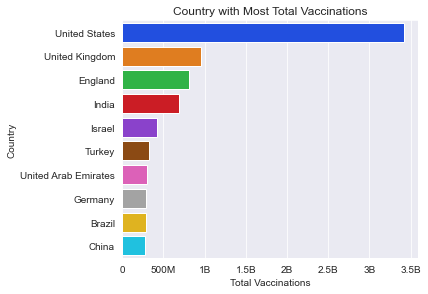

In [14]:
# Country with the most total vaccinations
total_vaccinations = df.groupby("Country", as_index=False)["Total Vaccinations"].sum().sort_values("Total Vaccinations", ascending=False).reset_index(drop=True)
pd.options.display.float_format = '{:,.2f}'.format

sns.set_style('darkgrid')

sns.barplot(x="Total Vaccinations", y="Country", data=total_vaccinations.head(10), palette='bright')

plt.tight_layout()
plt.title("Country with Most Total Vaccinations")
plt.xlabel("Total Vaccinations", fontsize=10)
plt.ylabel("Country", fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax = plt.gca()
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
total_vaccinations.head(10)

<h4>Visualize Country with the most people vaccinated<h4>

Total number of people vaccinated: a person, depending on the immunization scheme, will receive one or more (typically 2) vaccines; at a certain moment, the number of vaccination might be larger than the number of people;

Total number of people fully vaccinated: this is the number of people that received the entire set of immunization according to the immunization scheme (typically 2); at a certain moment in time, there might be a certain number of people that received one vaccine and another number (smaller) of people that received all vaccines in the scheme;

,Country,People Vaccinated,People Fully Vaccinated
0,United States,"2,396,098,433.00","985,399,817.00"
1,United Kingdom,"912,849,709.00","47,068,251.00"
2,England,"776,357,820.00","37,978,202.00"
3,India,"593,358,331.00","91,479,213.00"
4,Israel,"269,684,307.00","158,680,343.00"
5,Brazil,"238,901,412.00","47,393,201.00"
6,Turkey,"217,856,582.00","62,697,938.00"
7,Germany,"205,102,743.00","86,226,307.00"
8,Italy,"152,287,386.00","68,157,372.00"
9,France,"142,546,111.00","51,902,063.00"


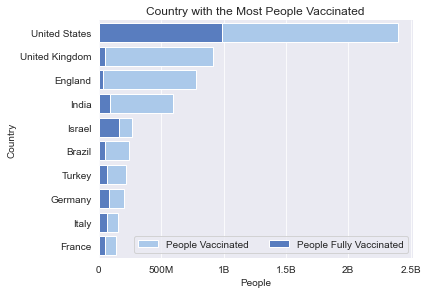

In [15]:
# Country with the most people vaccinated
people_vaccinated = df.groupby("Country", as_index=False)["People Vaccinated","People Fully Vaccinated"].sum().sort_values("People Vaccinated", ascending=False).reset_index(drop=True)
pd.options.display.float_format = '{:,.2f}'.format

sns.set_style('darkgrid')
sns.set_color_codes('pastel')
sns.barplot(x="People Vaccinated", y="Country", data=people_vaccinated.head(10), color='b', edgecolor='w', label='People Vaccinated')
sns.set_color_codes('muted')
sns.barplot(x="People Fully Vaccinated", y="Country", data=people_vaccinated.head(10), color='b', edgecolor='w', label='People Fully Vaccinated')

plt.tight_layout()
plt.title("Country with the Most People Vaccinated")
plt.xlabel("People", fontsize=10)
plt.ylabel("Country", fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax = plt.gca()
ax.legend(ncol = 2, loc = 'lower right')
sns.despine(left = True, bottom = True)
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
people_vaccinated.head(10)